# 04-4 분류용 데이터 세트를 준비합니다

## 유방암 데이터 세트 준비하기

1. load_breast_cancer()함수 호출하기

In [2]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
cancer = load_breast_cancer()

2. 입력 데이터 확인하기  
: cancer에는 569개의 샘플과 30개의 특성이 있다는 것을 알 수 있음

In [3]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


: 이 중에 처음 3 개의 샘플을 출력해보자

In [4]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

: 해당 데이터 세트의 경우 특성이 30개나 되므로,산점도를 그려서 표현하기 보다는 박스 플롯을 이용하여 각 특성의 사분위 값을 나타내보자. 

3. 박스 플롯으로 특성의 사분위 관찰하기


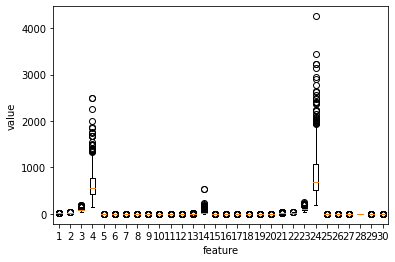

In [5]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

4. 눈에 띄는 특성 살펴보기
: 박스 플롯을 보면 4, 14, 24번 째 특성이 다른 특성보다 값의 분포가 훨씬 크다는 것을 알 수 있다. 해당 특성의 인덱스를 리스트로 묶어 전달하여 각 인덱스의 특성을 확인해보면 넓이와 관련된 특성임을 확인할 수 있다

In [6]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

5. 타깃 데이터 확인하기
: cancer.target 배열 안에는 0(음성 샘픔: 정상 종양), 1(양성 샘플: 악성 종양)만 들어 있다.numpy 의 unique()함수를 사용하여 고유한 값을 찾아 반환해보자. 이때 return_counts 매개변수를 True로 지정하여 고유한 값이 등장하는 횟수까지 세어 반환 해보자

In [7]:
np.unique(cancer.target, return_counts= True)

(array([0, 1]), array([212, 357]))

: unique() 함수가 반환한 값을 확인해보면, 왼쪽의 값은 cancer.target안에 들어 있는 고유한 값(0,1)을 의미한다. 즉 cancer.target에는 0이나 1이라는 값만 들어 있다. 오른쪽의 값은 타깃 데이터의 고유한 값의 개수를 센 다음 반환한 것이다. 즉 212개의 음성 클래스, 357개의 양성 클래스가 들어 있음을 알 수 있다

6. 훈련 데이터 세트 저장하기

In [8]:
x = cancer.data
y = cancer.target

# 04-5 로지스틱 회귀를 위한 뉴런을 만듭니다

## 훈련 세트와 테스트 세트로 나누기
: 양성 클래스와 음성 클래스의 비율을 일정하게 유지하면서 훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누어 보자.

1. train_test_split() 함수로 훈련 데이터 세트 나누기

In [9]:
from sklearn.model_selection import train_test_split

그런 다음 train_test_split()함수에 입력 데이터 x, 타깃 데이터 y와 그 밖의 설정을 매개 변수로 지정하면 된다  
매개 변수 설정에 대한 내용은 다음과 같다  
- stratify = y  
: stratify는 훈련 데이터를 나눌 때 클래스 비율을 동일하게 만든다 train_test_split() 함수는 기본적으로 데이터를 나누기 전에 섞지만 일부 클래스 비율이 불균형한 경우에는 stratify를 y로 지정해야 한다

- test_size = 0.2  
: train_test_split() 함수는 기본적으로 훈련 데이터 세트를 75:25로 나눈다. 이 비율을 조절하고 싶을 때, test_size 매개변수에 테스트 세트의 비율을 전달하면 비율을 조절할 수 있다.

- random_state = 42  
: train_test_split()함수는 무작위로 데이터 세트를 섞은 다음 나눈다. 이 책에서는 섞은 다음 나눈 결과가 항상 일정하도록 난수 초기값 42를 지정했다.


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

2. 결과 확인하기

In [11]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


3. unique() 함수로 훈련 세트와 타깃 확인하기

In [12]:
np.unique(y_train, return_counts = True)

(array([0, 1]), array([170, 285]))

## 로지스틱 회귀 구현하기
: 로지스틱 화귀는 정방향으로 데이터가 흘러가는 과정(정방향 계산)과 가중치를 업데이트하기 위해 역방향으로 데이터가 흘러가는 과정(역방향 계산)을 구현해야 한다.  


- __init()__메서드는 가중치와 절편을 미리 초기화하지 않습니다  
: 가중치는 나중에 입력 데이터를 보고 특성 개수에 맞게 결정합니다

- forpass() 메서드에 넘파이 함수를 사용합니다  

In [13]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self,x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

## 훈련하는 메서드 구현하기
: 훈련을 수행하는 fit()메서드를 구현해보자

1. fit() 메서드 구현하기
: fit() 메서드의 기본 구조는 3장의 뉴런 클래스와 같으나 다만 활성화 함수가 추가된 점이 다르다.   
역방향 계산에는 로지스틱 손실 함수의 도함수를 적용합니다.

In [14]:
def fit(self, x, y, epochs = 100):
  self.w = np.ones(x.shape[1]) # 가중치를 초기화합니다
  self.b = 0                   # 절편을 초기화합니다
  for i in range(epochs):      # epoches만큼 반복합니다
    for x_i, y_i in zip(x,y):  # 모든 샘플에 대해 반복합니다
      z = self.forpass(x_i)    # 정방향 계산
      a = self.activation(z)   # 활성화 함수 적용
      err = -(y_i - a)         # 오차 계산
      w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
      self.w -= w_grad         # 가중치 업데이트
      self.b -= b.grad         # 절편 업데이트

In [15]:
x.shape[1]

30

2. activation() 메서드 구현하기
: activation() 메서드에는 시그모이드 함수가 사용되어야 합니다. 시그모이드 함수는 자연 상수의 지수함수를 계산하는 넘파이의 np.exp()함수를 사용하면 간단히 만들 수 있다

In [16]:
def activation(self,z):
  a = 1 / (1 + np.exp(-z))
  return a

## 예측하는 메서드 구현하기
: 03장에서와 다르게 분류에서는 활성화 함수와 임계 함수도 적용해야 하므로 새로운 샘플에 대한 예측값을 계산해주는 메서드인 predict() 메서드를 만들어보자

1. predict() 메서드 구현하기
: predict()메서드의 매개변수 값으로 입력값 x가 2차원 배열로 전달된다고 가정하고 구현해보자. 예측값은 입력값을 선형 함수와 활성화 함수, 임계 함수 순서로 통과시키면 구할 수 있다. 앞에서 forpass()와 activation() 메서드를 이미 구현했으니 predict()메서드는 다음과 같이 간단하게 구현할 수 있다.

In [17]:
def predict(self, x):
  z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용
  a = self.activation(np.array(z))     # 활성화 함수 적용
  return a > 0.5                       # 계단 함수 적용

## 구현 내용 한눈에 보기

In [21]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self,x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self,z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1]) # 가중치를 초기화합니다
    self.b = 0                   # 절편을 초기화합니다
    for i in range(epochs):      # epoches만큼 반복합니다
      for x_i, y_i in zip(x,y):  # 모든 샘플에 대해 반복합니다
        z = self.forpass(x_i)    # 정방향 계산
        a = self.activation(z)   # 활성화 함수 적용
        err = -(y_i - a)         # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
        self.w -= w_grad         # 가중치 업데이트
        self.b -= b_grad         # 절편 업데이트

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용
    a = self.activation(np.array(z))     # 활성화 함수 적용
    return a > 0.5                       # 계단 함수 적용

## 로지스틱 회귀 모델 훈련시키기
1. 모델 훈련하기

In [22]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


2. 테스트 세트 사용해 모델의 정확도 평가하기

In [23]:
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


0.8245614035087719

# 04-6. 로지스틱 회귀 뉴런으로 단일층 신경망을 만듭니다

## 단일층 신경망을 구현합니다

### 손실함수의 결괏값 저장 기능 추가하기
- 손실 함수의 결괏값을 저장할 리스트 self.losses 만들기
- 샘플마다 손실 함수를 계산하고 그 결괏값을 모두 더한 다음 샘플 개수로 나눈 평균값을 self.losses 변수에 저장
- self.activation()메서드로 계산한 a는 np.log()의 계산을 위해 한 번 더 조정한다

In [32]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self,x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self,z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1]) # 가중치를 초기화합니다
    self.b = 0                   # 절편을 초기화합니다
    for i in range(epochs):      # epoches만큼 반복합니다
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다
      for i in indexes:              # 모든 샘플에 대해 반복합니다
        z = self.forpass(x[i])     # 정방향 계산
        a = self.activation(z)     # 활성화 함수 적용
        err = -(y[i] - a)          # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
        self.w -= w_grad           # 가중치 업데이트
        self.b -= b_grad           # 절편 업데이트
        a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 에포크마다 평균 손실을 저장합니다
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용
    return np.array(z) > 0               # 계단 함수 적용

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

## 단일층 신경망 훈련하기
1. 단일층 신경망 훈련하고 정확도 출력하기

In [33]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.9385964912280702

2. 손실 함수 누적값 확인하기

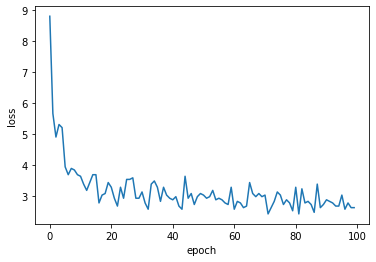

In [35]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 04-7. 사이킷런으로 로지스틱 회귀를 수행합니다

## 사이킷런으로 경사 하강법 적용하기
1. 로지스틱 손실 함수 지정하기

In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3, random_state = 42)

2. 사이킷런으로 훈련하고 평가하기

In [43]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

3. 사이킷런으로 예측하기

In [44]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])